Importing pandas and numpy

In [1]:
import pandas as pd
import numpy as np

Loading training set into dataframe called df

In [2]:
df = pd.read_csv('../data/raw/train.csv',low_memory=False)

In [3]:
df['ht'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 56091 entries, 0 to 56090
Series name: ht
Non-Null Count  Dtype 
--------------  ----- 
56011 non-null  object
dtypes: object(1)
memory usage: 438.3+ KB


converting height to cm

In [4]:
# height in centimeters
def feet_inches_to_cm(height):
    if isinstance(height, str):  
        parts = height.split('-')
        if len(parts) == 2 and parts[0].isdigit() and parts[1].isdigit():
            feet = int(parts[0])
            inches = int(parts[1])
        else:
            try:
                feet = int(parts[0])
                inches = 0
            except ValueError:
                return None  # for missing values
        total_inches = feet * 12 + inches
        cm = total_inches * 2.54
        return float(cm)
    return None  

In [5]:

df['ht_cm'] = df['ht'].apply(feet_inches_to_cm)

In [6]:
df['ht_cm'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 56091 entries, 0 to 56090
Series name: ht_cm
Non-Null Count  Dtype  
--------------  -----  
52090 non-null  float64
dtypes: float64(1)
memory usage: 438.3 KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

Removing nulls

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

Selecting numerical columns

In [9]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

In [10]:
numerical_columns

Index(['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per',
       'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA',
       'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr',
       'porpag', 'adjoe', 'pfr', 'year', 'Rec_Rank', 'ast_tov', 'rimmade',
       'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio',
       'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'drafted', 'ht_cm'],
      dtype='object')

In [11]:
df_num = df[numerical_columns]
df_num

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted,ht_cm
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0,60.96
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0,121.92
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0,121.92
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0,121.92
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0,243.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56086,1,0.1,0.0,48.9,0.0,0.00,0.0,0.0,0.0,0.0,...,-17.439600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,335.28
56087,1,0.2,206.9,35.9,100.0,102.56,0.0,0.0,0.0,0.0,...,9.392350,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0,30.48
56088,1,0.6,48.5,28.9,0.0,52.63,0.0,15.9,0.0,52.9,...,-3.240610,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,0,NaN
56089,1,0.1,300.0,20.0,150.0,150.00,0.0,0.0,0.0,0.0,...,16.362500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0,60.96


Finding correlation between features and target

In [12]:
cm = df_num.corr()
target_cm = abs(cm['drafted']).sort_values(ascending=False)

Splitting data into features and target

selecting features with correlation > 0.5

In [13]:
selected = target_cm[target_cm > 0.5].index.tolist()
features = df_num[selected]

In [14]:
features

,drafted
0,0
1,0
2,0
3,0
4,0
...,...
56086,0
56087,0
56088,0
56089,0


In [15]:
target = df_num['drafted']

In [16]:
print(features.shape,target.shape)

(56091, 1) (56091,)


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Training the model

In [21]:
from xgboost import XGBClassifier

grid search for best parameters

In [22]:
best_auc = 0
best_gamma = None
best_alpha = None
gamma_values = [0, 0.001, 0.01, 0.1, 1, 10]
alpha_values = [0, 0.001, 0.01, 0.1, 1, 10]

In [23]:
from sklearn.metrics import roc_auc_score

In [24]:
for gamma in gamma_values:
    for alpha in alpha_values:
        # Model training with regularization (XGBoost)
        xgb = XGBClassifier(gamma=gamma, alpha=alpha)
        xgb.fit(X_train_scaled, y_train)
        
        # Model evaluation with regularization (XGBoost)
        y_pred_prob = xgb.predict_proba(X_val_scaled)[:, 1]
        roc_auc = roc_auc_score(y_val, y_pred_prob)
        
        if roc_auc > best_auc:
            best_auc = roc_auc
            best_gamma = gamma
            best_alpha = alpha

Training final model with best parameters

In [25]:
final_xgb = XGBClassifier(gamma=best_gamma, alpha=best_alpha)
final_xgb.fit(X_train_scaled, y_train)

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [26]:
# Model evaluation (XGBoost)
y_pred_prob = final_xgb.predict_proba(X_val_scaled)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred_prob)
print(f'XGBoost AUROC: {roc_auc:.4f}')

XGBoost AUROC: 1.0000


In [27]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

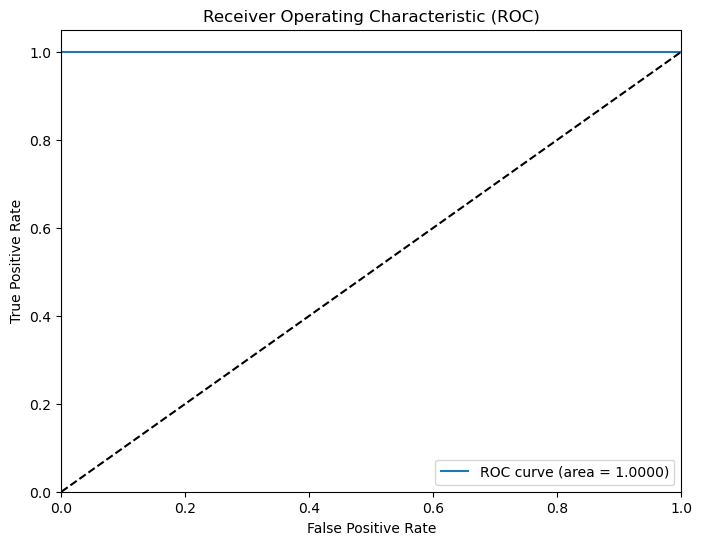

In [28]:
fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [96]:
test_data = pd.read_csv('../data/raw/test.csv',low_memory=False)

In [97]:
test_data_processed = pd.get_dummies(test_data)
test_data_processed = test_data_processed.reindex(columns=features.columns, fill_value=0)  # Align columns
test_data_scaled = scaler.transform(test_data_processed)
predictions = final_xgb.predict_proba(test_data_scaled)[:,1]

In [98]:
test_data['drafted'] = predictions
print(test_data[['player_id', 'drafted']])

                                 player_id   drafted
0     cf302b4d-84f7-4124-a25d-a75eed31978b  0.000022
1     f91837cd-4f49-4b70-963d-aeb82c6ce3da  0.000022
2     53ec2a29-1e7d-4c6d-86d7-d60d02af8916  0.000022
3     32402798-471c-4a54-8cb4-29cd95199014  0.000022
4     73b960f9-27b8-4431-9d23-a760e9bbc360  0.000022
...                                    ...       ...
4965  a25ee55f-02a3-4f8e-8194-a5f427e14e7c  0.000022
4966  d0d9f45e-7b01-44b3-8d40-514ec338611d  0.000022
4967  f8df22c4-1602-4fab-896d-8820951aae2f  0.000022
4968  b791c69a-f769-4163-afda-051a6fd20a9d  0.000022
4969  18b51f5d-4746-4121-88fd-c8d0a1399130  0.000022

[4970 rows x 2 columns]


In [99]:
test_data[['player_id', 'drafted']].to_csv('predictions_xgb_params_overfit.csv',index=False)